# Step 0: Load Packages and Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


import os
from scipy.sparse import coo_matrix

# Step 1: Data Loading and Preprocessing

In [3]:
# Read your dataset (replace 'marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv' with your dataset path)
train_data = pd.read_csv('marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv', sep='\t')
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [4]:
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=42)  # Adjust test_size as needed
train_data.head()

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
4227,c18784a72bf1ee3a05b624500b8d68f0,2020-07-22 07:43:39 +0000,NaN,874b3ed9d388891ebf73b5a81641973a,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/ae0b1340-cf07...,NaN,Abri-Form Premium 2 Adult Incontinence Brief H...,NaN,NaN,NaN,NaN,4379a4bea9435fde9a4d0a9b23e591ef
4676,09f57d63f6826c2c7de520443da44aa5,2020-10-29 14:38:15 +0000,NaN,7da0da0f897ad08e2f559c81642dda53,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0b3e3999-d3b0...,NaN,Neutrogena Ultra Sheer Lightweight Sunscreen S...,NaN,NaN,NaN,NaN,fedd0e8973b8177d503d68fe3306e2e1
800,313fc0f52fa5b9ae428ec9840cde933b,2020-07-30 04:09:32 +0000,NaN,f97ee09d5499a108fdef2f17188753ea,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/69cc540e-3445...,NaN,"Redken Shades Eq Hair Color Gloss, 03Rv, Merlo...",NaN,4.8,162.0,NaN,5740546f4fe840fd96801c163049e07b
3671,808500157d2c7dca94df0880f3aedd18,2020-07-01 01:58:25 +0000,NaN,472e2709306635cb581434d855737556,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/82b79ca4-61bd...,NaN,"Le Male All-Over Shower Gel, 6.8 Oz, Wal-mart,...",NaN,NaN,NaN,NaN,ca1ee7dc05e48f2887ddf50b051e4bc0
4193,9b0541cb2bc6173757707aaba52ab680,2020-11-30T17:24:50+00:00,NaN,cff37b26cd843e2ab36b064d298456e7,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/f5cce536-5559...,NaN,SUNFLOWER OIL UNREFINED ORGANIC CARRIER COLD P...,NaN,NaN,1.0,NaN,6ab756241426f6d5799e241fe0adca57


# Basic Operations

In [5]:
train_data['Product Tags']

4227    Abri-Form Premium 2 Adult Incontinence Brief H...
4676    Neutrogena Ultra Sheer Lightweight Sunscreen S...
800     Redken Shades Eq Hair Color Gloss, 03Rv, Merlo...
3671    Le Male All-Over Shower Gel, 6.8 Oz, Wal-mart,...
4193    SUNFLOWER OIL UNREFINED ORGANIC CARRIER COLD P...
                              ...                        
4426    Davines Nounou Nourishing Illuminating Shampoo...
466     Revlon Super Lustrous Lipstick, Pink Cognito, ...
3092    Now Foods Aloe Vera Gels, 100 Softgels-3 Pack,...
3772    Full Circle Tidy Dish Cloths, FC10206, 3 count...
860     SinfulColors SinfulShine Step 1 Color Nail Col...
Name: Product Tags, Length: 4000, dtype: object

In [6]:
train_data.shape

(4000, 32)

In [7]:
#train_data.isnull().sum()
test_data.isnull().sum()

Uniq Id                               0
Crawl Timestamp                       0
Dataset Origin                     1000
Product Id                            0
Product Barcode                    1000
Product Company Type Source           0
Product Brand Source                973
Product Brand Normalised Source     973
Product Name Source                 973
Match Rank                         1000
Match Score                        1000
Match Type                         1000
Retailer                              0
Product Category                      2
Product Brand                         3
Product Name                          0
Product Price                         8
Sku                                1000
Upc                                1000
Product Url                           0
Market                                0
Product Description                 234
Product Currency                      0
Product Available Inventory           0
Product Image Url                     0


In [8]:
# Get all columns with object (string) data type
object_columns = train_data.select_dtypes(include=['object']).columns

# Get all columns with numerical data type (excluding 'ID' and 'ProdID')
numerical_columns = train_data.select_dtypes(include=['number']).columns
numerical_columns = numerical_columns[~numerical_columns.isin(['ID', 'ProdID'])]  # Exclude 'ID' and 'ProdID'

# Fill missing values in train_data
train_data[object_columns] = train_data[object_columns].fillna('')  # Fill object columns with empty strings
train_data[numerical_columns] = train_data[numerical_columns].fillna(0)  # Fill numerical columns with 0

# Fill missing values in test_data (using the same logic)
test_data[object_columns] = test_data[object_columns].fillna('')  
test_data[numerical_columns] = test_data[numerical_columns].fillna(0)

In [9]:
#train_data.isnull().sum()
test_data.isnull().sum()

Uniq Id                            0
Crawl Timestamp                    0
Dataset Origin                     0
Product Id                         0
Product Barcode                    0
Product Company Type Source        0
Product Brand Source               0
Product Brand Normalised Source    0
Product Name Source                0
Match Rank                         0
Match Score                        0
Match Type                         0
Retailer                           0
Product Category                   0
Product Brand                      0
Product Name                       0
Product Price                      0
Sku                                0
Upc                                0
Product Url                        0
Market                             0
Product Description                0
Product Currency                   0
Product Available Inventory        0
Product Image Url                  0
Product Model Number               0
Product Tags                       0
P

In [10]:
#train_data.duplicated().sum()
test_data.duplicated().sum()

0

In [11]:
# make columns shorter
# Define the mapping of current column names to shorter names
column_name_mapping = {
    'Uniq Id': 'ID',
    'Crawl Timestamp': 'CrawlTime',
    'Dataset Origin': 'DataOrigin',
    'Product Id': 'ProdID',
    'Product Barcode': 'Barcode',
    'Product Company Type Source': 'CompanyType',
    'Product Brand Source': 'BrandSource',
    'Product Brand Normalised Source': 'BrandNorm',
    'Product Name Source': 'NameSource',
    'Match Rank': 'MatchRank',
    'Match Score': 'MatchScore',
    'Match Type': 'MatchType',
    'Retailer': 'Retailer',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Price': 'Price',
    'Sku': 'Sku',
    'Upc': 'Upc',
    'Product Url': 'ProdURL',
    'Market': 'Market',
    'Product Description': 'Description',
    'Product Currency': 'Currency',
    'Product Available Inventory': 'Inventory',
    'Product Image Url': 'ImageURL',
    'Product Model Number': 'ModelNumber',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Bsr': 'Bsr',
    'Joining Key': 'JoiningKey'
}

# Rename the columns in train_data and test_data
train_data = train_data.rename(columns=column_name_mapping)
test_data = test_data.rename(columns=column_name_mapping)

In [12]:
train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)
train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)

test_data['ID'] = test_data['ID'].str.extract(r'(\d+)').astype(float)
test_data['ProdID'] = test_data['ProdID'].str.extract(r'(\d+)').astype(float)

# Step 2: EDA (Exploratory Data Analysis)

In [13]:
# Basic statistics
num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 1409
Number of unique items: 1406
Number of unique ratings: 36


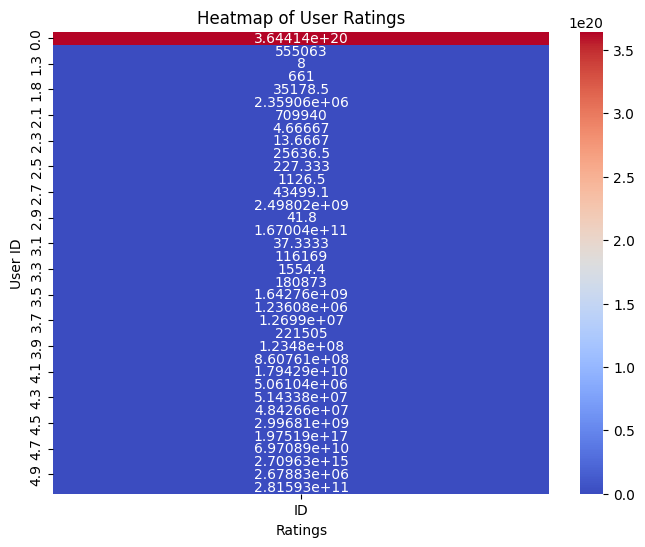

In [14]:
# Pivot the DataFrame to create a heatmap
heatmap_data = train_data.pivot_table('ID', 'Rating')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()

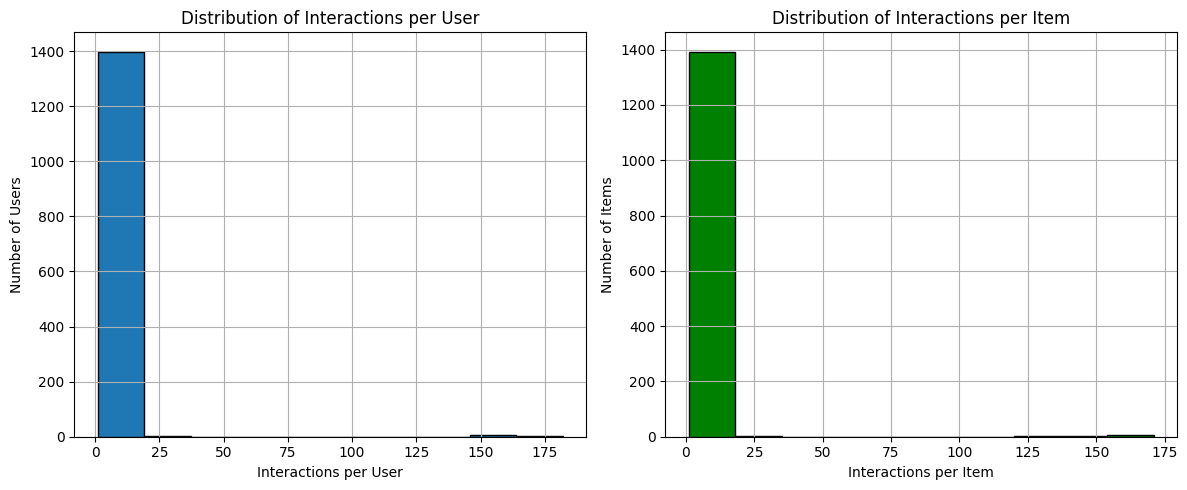

In [15]:
# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular items')

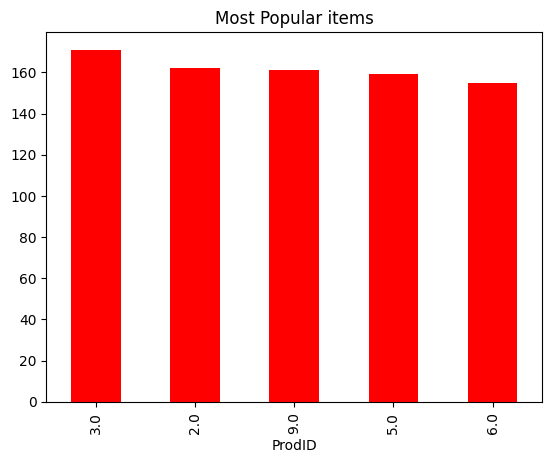

In [16]:
# Most popular items
popular_items = train_data['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar',color='red')
plt.title("Most Popular items")

<Axes: xlabel='Rating'>

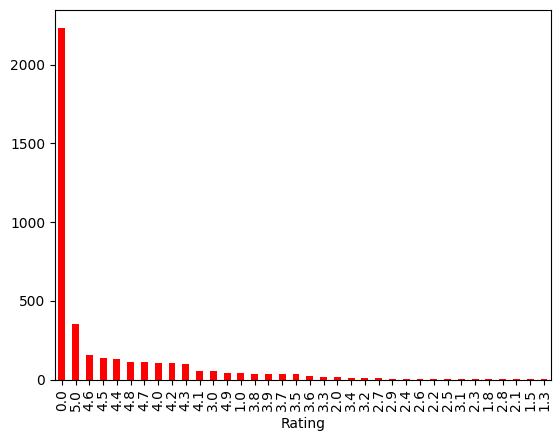

In [17]:
# most rated counts
train_data['Rating'].value_counts().plot(kind='bar',color='red')

# Step 3: Data Cleaning and Tags Creations

In [18]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

# Apply to train_data
for column in columns_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

# Apply to test_data (using the same logic)
for column in columns_to_extract_tags_from:
    test_data[column] = test_data[column].apply(clean_and_extract_tags)

In [19]:
# Concatenate the cleaned tags from all relevant columns
train_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)
test_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

# Rating Base Recommendations System

In [20]:
average_ratings = train_data.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()

In [21]:
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)

rating_base_recommendation = top_rated_items.head(10)

In [22]:
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)

C:\Users\USER\AppData\Local\Temp\ipykernel_14360\565725879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
C:\Users\USER\AppData\Local\Temp\ipykernel_14360\565725879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


In [23]:
print("Rating Base Recommendation System: (Trending Products)")
rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]
rating_base_recommendation

Rating Base Recommendation System: (Trending Products)


C:\Users\USER\AppData\Local\Temp\ipykernel_14360\393183274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]


,Name,ReviewCount,Brand,ImageURL,Rating
3152,Revlon x Wonder Woman WW84 Super Lustrous Lips...,2,revlon,https://i5.walmartimages.com/asr/f0d8c3df-62e8...,5
1373,Equate 3 fl. oz Apples & Cinnamon Stick Frosti...,1,equate,https://i5.walmartimages.com/asr/7045a61c-8aa7...,5
569,Aubrey Mens Stock Ginseng Biotin Shampoo & Sca...,2,aubrey,https://i5.walmartimages.com/asr/a85fa1c8-5513...,5
570,Aubrey Organics GPB Balancing Protein Conditio...,1,aubrey,https://i5.walmartimages.com/asr/8c076a54-7dd3...,5
1923,"Kneipp Mineral Bath Salt, Deep Breathe, Pine a...",1,kneipp,https://i5.walmartimages.com/asr/8207d9ea-f834...,5
572,Aura Cacia Essential Oil Frankincense 0.5 fl o...,13,"aura, cacia",https://i5.walmartimages.com/asr/d5261a71-0787...,5
1379,Equate Beauty Makeup Remover Cleansing Towelet...,3,"equate, beauty",https://i5.walmartimages.com/asr/c3e000a7-2fab...,5
3151,Revlon x Wonder Woman WW84 Super Lustrous Lips...,2,revlon,https://i5.walmartimages.com/asr/b871a669-7926...,5
3134,"Revlon Perfectweeze Tweezer, Slant Tip, 1 ea (...",5,revlon,https://i5.walmartimages.com/asr/aee77d8c-4d25...,5
510,Anti-burst Yoga Ball Thickened Stability Balan...,3,anself,https://i5.walmartimages.com/asr/149cb88d-5ae3...,5


# Content Base Recommendation system (User Preferences or Items similarities)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [25]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index = train_data[train_data['Name']==item_name].index[0]

In [26]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))

In [27]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indics = [x[0] for x in top_similar_items]

In [28]:
train_data.iloc[recommended_items_indics][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
2598,Attends Healthcare Products 15153110 White Sma...,39.0,attends
4143,Attends Healthcare Products Adult Incontinent ...,0.0,attends
716,First Quality Adult Incontinent Brief Prevail ...,1.0,prevail
3014,"Abena Delta Form Adult Incontinence Brief, Siz...",0.0,abena
4398,Attends Extended Wear Unisex Incontinence Line...,0.0,attends
55,Depend Fit-Flex Incontinence Underwear for Men...,1412.0,depend
255,Depend Fit-Flex Incontinence Underwear for Men...,2202.0,depend
4823,3-Pack Wearever Mens Horizontal Fly Incontinen...,0.0,wearever
1862,Waterproof Incontinence Underpants 3 Pair,19.0,"fox, valley, traders"


# Function To Recommend Products for Content Base

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame(columns=['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating', 'ProdID'])  # Return empty DataFrame with correct columns

    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    
    tfidf_matrix_train = tfidf_vectorizer.fit_transform(train_data['Tags'])  # Fit on train_data
    
    item_data = train_data[train_data['Name'] == item_name]  # Get data for the input item
    
    tfidf_matrix_item = tfidf_vectorizer.transform(item_data['Tags'])  # Transform item data

    cosine_similarities_content = cosine_similarity(tfidf_matrix_item, tfidf_matrix_train)  # Compare item to training data

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details

In [47]:
# Example: Get content-based recommendations for a specific item
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
1215,OPI Nail Lacquer Polish .5oz/15mL - Put A Coat...,0.0,opi,https://i5.walmartimages.com/asr/b51a716d-565c...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
1042,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,0.0
3252,"OPI Nail Lacquer Nail Polish, Shorts Story",1.0,opi,https://i5.walmartimages.com/asr/7c9a6ccf-4d10...,5.0
3639,OPI Nail Polish and Dipping Powder Perfection ...,0.0,opi,https://i5.walmartimages.com/asr/56498786-a804...,0.0
4230,OPI GELCOLOR + MATCHING LACQUER MY PRIVATE JET...,0.0,opi,https://i5.walmartimages.com/asr/e13426fa-c0d2...,0.0
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0


In [31]:
'''

# Example: Get content-based recommendations for a specific item
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec
'''

"\n\n# Example: Get content-based recommendations for a specific item\nitem_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'\ncontent_based_rec = content_based_recommendations(train_data, item_name, top_n=8)\n\ncontent_based_rec\n"

# Collaborative Filtering (User Item Similarity)

In [48]:
user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating',aggfunc='mean').fillna(0).astype(int)

In [49]:
user_similarity = cosine_similarity(user_item_matrix)

In [50]:
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [51]:
user_similarities = user_similarity[target_user_index]

similar_user_indices = user_similarities.argsort()[::-1][1:]

In [52]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)
    
    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name','ReviewCount','Brand','ImageURL','Rating']]

In [53]:
recommended_items_details.head(10)

,Name,ReviewCount,Brand,ImageURL,Rating
3867,SH50 Replacement Heads for Philips Norelco Ser...,5.0,philips,https://i5.walmartimages.com/asr/d22b24fe-062e...,4.2
4619,"Maybelline Matte Ink Liquid Lipstick, Lip Make...",7838.0,maybelline,https://i5.walmartimages.com/asr/d0836c74-5a24...,0.0
4696,"Burts Bees Lip Gloss, Autumn Haze, 0.2 oz (Pac...",93.0,"burt, bees",https://i5.walmartimages.com/asr/7caceb3a-97c2...,4.4
2834,"Stila Stay All Day Waterproof Liquid Eyeliner,...",5.0,stila,https://i5.walmartimages.com/asr/a66a8082-e712...,4.0
1479,Davines Minu Illuminating Protective Condition...,0.0,davines,https://i5.walmartimages.com/asr/3ef65c4d-b9b9...,0.0
152,(3 Pack) Tadin Boldo Herbal Tea (24 Teabags) /...,0.0,tadin,https://i5.walmartimages.com/asr/074ad2ee-562b...,0.0
2980,Ralph Lauren Polo Red Pormts13-A 1.3 Oz. Mens ...,54.0,"ralph, lauren, polo, red",https://i5.walmartimages.com/asr/13a25b2c-e042...,0.0
937,LOreal Skin Expertise RevitaLift Complete Eye ...,3.0,paris,https://i5.walmartimages.com/asr/619e9586-31f0...,0.0
1937,Apiario silvestre green propolis glycolic extr...,5.0,"apirio, silvestre",https://i5.walmartimages.com/asr/bc07c40b-6c80...,3.4
4279,Joico Color Infuse Red Shampoo and Conditioner...,1.0,joico,https://i5.walmartimages.com/asr/0ba846a3-0f9d...,0.0


# Function That Recommend Items

In [54]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create user-item matrix from training data
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate user similarity matrix
    user_similarity = cosine_similarity(user_item_matrix)

    # Check if target_user_id exists in the user-item matrix
    if target_user_id not in user_item_matrix.index:
        print(f"User {target_user_id} not found in the training data.")
        return pd.DataFrame()

    # Get the index of the target user
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort users by similarity (excluding the target user)
    similar_user_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations
    recommended_items = []
    for user_index in similar_user_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user > 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get details of recommended items from training data (remove duplicates)
    recommended_items_details = train_data[train_data['ProdID'].isin(recommended_items)][
        ['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']
    ].drop_duplicates(subset=['Name'])

    return recommended_items_details.head(top_n)

# Example usage (replace target_user_id with your desired user ID):
target_user_id = 4 
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id, top_n=5)
print(collaborative_filtering_rec)

                                                   Name  ReviewCount  \
4193  SUNFLOWER OIL UNREFINED ORGANIC CARRIER COLD P...          1.0   
2776         Orgain Organic Superfoods Powder, 0.62 Lb.         27.0   
99    Vaseline Lip Therapy, Advanced Formula Skin Pr...        125.0   
4245  Saint Lipstick - Natural by Lipstick Queen for...          0.0   
191   Schick Injector Blades Mens Razor Blade Refill...         20.0   

                Brand                                           ImageURL  \
4193     oils, center  https://i5.walmartimages.com/asr/f5cce536-5559...   
2776           orgain  https://i5.walmartimages.com/asr/0f4543cd-5c1f...   
99           vaseline  https://i5.walmartimages.com/asr/fad54675-368a...   
4245  lipstick, queen  https://i5.walmartimages.com/asr/b670c1d4-c929...   
191            schick  https://i5.walmartimages.com/asr/85feda69-e804...   

      Rating  
4193     0.0  
2776     4.9  
99       0.0  
4245     0.0  
191      4.5  


# Hybrid Recommendations

In [55]:
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id, top_n)
    
    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()
    
    return hybrid_rec.head(10)

In [56]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 4 # Change this to the user_id you want recommendations for
item_name = "OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath"  # Change this to the item name
hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath':


,Name,ReviewCount,Brand,ImageURL,Rating
1215,OPI Nail Lacquer Polish .5oz/15mL - Put A Coat...,0.0,opi,https://i5.walmartimages.com/asr/b51a716d-565c...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
1042,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,0.0
3252,"OPI Nail Lacquer Nail Polish, Shorts Story",1.0,opi,https://i5.walmartimages.com/asr/7c9a6ccf-4d10...,5.0
3639,OPI Nail Polish and Dipping Powder Perfection ...,0.0,opi,https://i5.walmartimages.com/asr/56498786-a804...,0.0
4230,OPI GELCOLOR + MATCHING LACQUER MY PRIVATE JET...,0.0,opi,https://i5.walmartimages.com/asr/e13426fa-c0d2...,0.0
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
2101,"OPI GelColor Gel Nail Polish, Hopelessly Devot...",1.0,opi,https://i5.walmartimages.com/asr/ff434827-53b4...,5.0
2484,"OPI Nail Lacquer, My Dogsled Is A Hybrid, 0.5 ...",2.0,opi,https://i5.walmartimages.com/asr/1499dde6-fc8e...,5.0


In [57]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 10 # Change this to the user_id you want recommendations for
item_name = 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'

hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Item 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum' not found in the training data.
Top 10 Hybrid Recommendations for User 10 and Item 'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum':


C:\Users\USER\AppData\Local\Temp\ipykernel_14360\2420251261.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()


,Name,ReviewCount,Brand,ImageURL,Rating,ProdID
800,"Redken Shades Eq Hair Color Gloss, 03Rv, Merlo...",162.0,redken,https://i5.walmartimages.com/asr/69cc540e-3445...,4.8,NaN
4193,SUNFLOWER OIL UNREFINED ORGANIC CARRIER COLD P...,1.0,"oils, center",https://i5.walmartimages.com/asr/f5cce536-5559...,0.0,NaN
2968,COVERGIRL Smoothers Moisturizing Concealer Sti...,520.0,covergirl,https://i5.walmartimages.com/asr/fad8be95-a188...,0.0,NaN
4793,5 Pairs High Durability Athletic Unisex Flat S...,7.0,"unique, bargains",https://i5.walmartimages.com/asr/408d4fde-092d...,4.3,NaN
2776,"Orgain Organic Superfoods Powder, 0.62 Lb.",27.0,orgain,https://i5.walmartimages.com/asr/0f4543cd-5c1f...,4.9,NaN
2970,Siaonvr 20Pcs Disposable Hand Washing Tablet T...,1.0,siaonvr,https://i5.walmartimages.com/asr/6c956096-af75...,1.0,NaN
3867,SH50 Replacement Heads for Philips Norelco Ser...,5.0,philips,https://i5.walmartimages.com/asr/d22b24fe-062e...,4.2,NaN
1743,Nicole by OPI Nail Lacquer,13.0,opi,https://i5.walmartimages.com/asr/af6a36f2-21a2...,4.8,NaN
3948,Olay Fresh Outlast Cooling White Strawberry an...,53.0,olay,https://i5.walmartimages.com/asr/34d0c72a-9324...,0.0,NaN
2024,Remington Virtually Indestructible Rotary Shav...,33.0,remington,https://i5.walmartimages.com/asr/3f2722a2-e966...,4.9,NaN


In [68]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    """
    Generates content-based recommendations.
    """
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()  # Return an empty DataFrame if item not found

    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n + 1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    recommended_items_details = train_data.iloc[recommended_item_indices][
        ['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating', 'ProdID']
    ]

    return recommended_items_details

def calculate_precision_recall_for_user(recommended_items, actual_items):
    """Calculates precision and recall for a single user."""
    # Items in both recommended and actual lists
    relevant_items = set(recommended_items) & set(actual_items)
    # Calculate precision (if there are recommendations)
    precision = len(relevant_items) / len(recommended_items) if recommended_items else 0
    # Calculate recall (if there are actual interactions)
    recall = len(relevant_items) / len(actual_items) if actual_items else 0
    return precision, recall

def calculate_precision_recall(train_data, test_data, top_n=10):
    """Calculates overall precision and recall using test_data."""
    all_item_ids = train_data['ProdID'].unique()
    precision_scores = []
    recall_scores = []

    for user_id, actual_interactions in test_data.groupby('ID'):
        user_train_interactions = train_data[train_data['ID'] == user_id]
        if user_train_interactions.empty:
            continue

        try:
            random_item_name = user_train_interactions.sample(1)['Name'].iloc[0]
        except IndexError:
            continue

        try:
            recommended_items_df = content_based_recommendations(train_data, random_item_name, top_n=top_n)
        except IndexError:
            continue
        
        if recommended_items_df.empty:
            continue

        recommended_item_ids = recommended_items_df['ProdID'][recommended_items_df['ProdID'].isin(all_item_ids)].tolist()
        actual_items = actual_interactions['ProdID'].tolist()

        precision, recall = calculate_precision_recall_for_user(recommended_item_ids, actual_items)
        precision_scores.append(precision)
        recall_scores.append(recall)

    avg_precision = np.mean(precision_scores) if precision_scores else 0
    avg_recall = np.mean(recall_scores) if recall_scores else 0

    return avg_precision, avg_recall

# Example usage:
precision, recall = calculate_precision_recall(train_data, test_data, top_n=10)  
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.03801652892561983
Recall: 0.1514798878435242


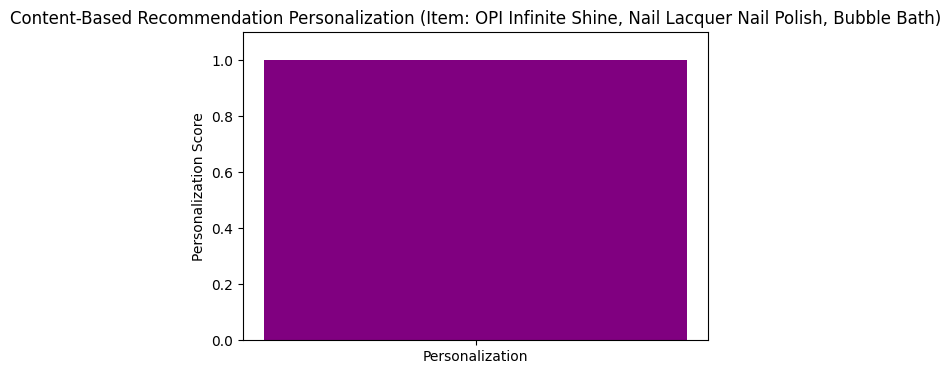

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Your existing functions: content_based_recommendations, calculate_personalization

def generate_personalization_chart(train_data, item_name, top_n=10):
    """Generates a bar chart visualizing the personalization score."""

    # Get content-based recommendations
    recommendations = content_based_recommendations(train_data, item_name, top_n)

    # Calculate personalization
    personalization = calculate_personalization(train_data, item_name, recommendations)

    # Create bar chart
    plt.figure(figsize=(6, 4))  # Adjust figure size as needed
    plt.bar(['Personalization'], [personalization], color='purple')
    plt.title(f'Content-Based Recommendation Personalization (Item: {item_name})')
    plt.ylabel('Personalization Score')
    plt.ylim([0, 1.1])  # Set y-axis limits
    plt.show()

# Example usage:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'  # Replace with your desired item
generate_personalization_chart(train_data, item_name, top_n=10)

In [76]:
import numpy as np

def calculate_precision_recall_collaborative(train_data, test_data, top_n=10):
    """Calculates precision and recall for collaborative filtering."""

    precision_scores = []
    recall_scores = []

    # Get common user IDs in train and test data
    common_users = set(train_data['ID'].unique()) & set(test_data['ID'].unique())

    for user_id in common_users:  # Iterate only over common users
        # Filter test data for the current user
        actual_interactions = test_data[test_data['ID'] == user_id]

        # Get actual item names interacted with by the user in the test data
        actual_items = actual_interactions['Name'].unique().tolist()  # Using 'Name' as unique identifier

        # Get recommendations for the user using your collaborative filtering function
        recommended_items_df = collaborative_filtering_recommendations(train_data, user_id, top_n=top_n)

        # Extract recommended item names
        recommended_item_names = recommended_items_df['Name'].tolist()

        # Calculate precision and recall for the user
        precision, recall = calculate_precision_recall_for_user(recommended_item_names, actual_items)

        precision_scores.append(precision)
        recall_scores.append(recall)

    # Calculate average precision and recall across all users
    avg_precision = np.mean(precision_scores) if precision_scores else 0
    avg_recall = np.mean(recall_scores) if recall_scores else 0

    return avg_precision, avg_recall

# Example usage
precision, recall = calculate_precision_recall_collaborative(train_data, test_data, top_n=10)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.0013333333333333335
Recall: 0.0014782608695652173


In [70]:
recommendations_df = collaborative_filtering_recommendations(train_data, user_id, top_n=10)
print(recommendations_df.columns)

Index(['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating'], dtype='object')
